## Data discovery

Using the [Lagain et al. catalog](https://doi.org/10.5281/zenodo.2546465) and [scikit-learn](https://scikit-learn.org/)

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Using pyvo we download the data from Jacobs VO service
import pyvo as vo

In [2]:
service = vo.dal.TAPService("http://epn2.epn-vespa.jacobs-university.de/tap")
mytables = iter(service.tables)
for tab in mytables:
        print(tab)
#service.describe()

crism.epn_core
crism_dev.epn_core
ivoa.emptyobscore
ivoa.obscore
m3.epn_core
mars_craters.epn_core
mars_craters_dev.epn_core
mars_craters_lagain.epn_core
op_mars_feat.epn_core
pangaea_x_2017.epn_core
sebastian.epn_core
tap_schema.schemas
tap_schema.tables
tap_schema.columns
tap_schema.keys
tap_schema.groups
tap_schema.key_columns
usgs_wms.epn_core


In [3]:
resultset = service.search("SELECT c1min,c2min,radius,type,status,lrd_morph FROM mars_craters_lagain.epn_core WHERE NOT (type='5')", maxrec=400000)

In [5]:
df = (resultset.to_table()).to_pandas()
df["rkm"] = df.radius / 1000.
df.head()

,c1min,c2min,radius,type,status,lrd_morph,rkm
0,138.720001,-15.799,660.0,b'1.0',b'Valid',b'',0.66
1,280.899002,15.758,660.0,b'1.0',b'Valid',b'',0.66
2,352.448000,15.716,660.0,b'1.0',b'Valid',b'',0.66
3,186.354004,-15.706,660.0,b'1.0',b'Valid',b'',0.66
4,139.792999,-15.656,660.0,b'1.0',b'Valid',b'',0.66


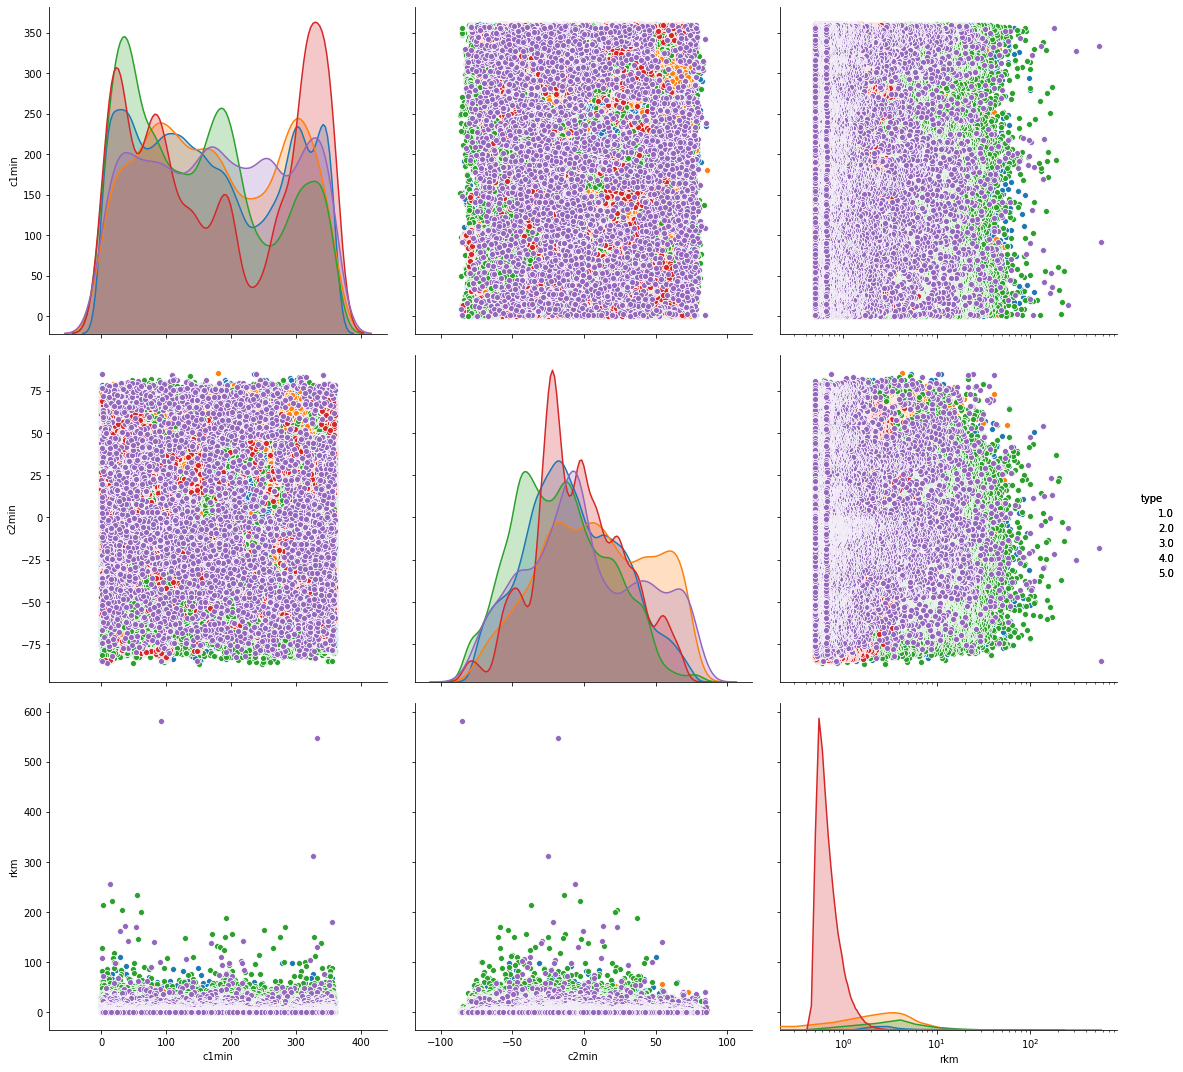

In [13]:
sns.color_palette('colorblind')
g = sns.pairplot(df,vars=["c1min","c2min","rkm"], height=5, hue="type")
g.axes[2,2].set(xscale="log")
#g.axes[2,0].set(yscale="log")
g.add_legend();

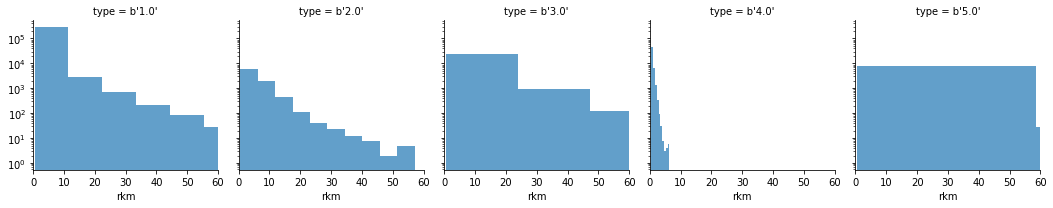

In [15]:
g = sns.FacetGrid(df, col="type")
g.map(plt.hist, "rkm", alpha=.7).set(xlim=(0, 60), yscale='log');
#g.add_legend();